#### 위너프로세스를 이용하여 주가의 Path만들기

- 미방을 직접 풀어서 만드는 방법  

> (1) MMA Equation: $\frac{ dM(t)}{M(t)}= rdt \Rightarrow M(T) = M(0)e^{rT}$  

---  

> (2) Geometric Brownian Motion: $r,q,\sigma$ is constant  

\begin{equation}
\begin{aligned}
\frac{ dS(t)}{S(t)} &= (r-q)dt + \sigma dW(t) \\
d \ln S(t) &= \left( (r-q)- \frac{1}{2}\sigma^2 \right) dt + \sigma dW(t) \\
S(T) &= S(0) \exp \left( \left( (r-q)- \frac{1}{2}\sigma^2 \right)T + \sigma W(T) \right)
\end{aligned}
\end{equation}  

---    

> (3) Given $S(t_n)$ at $t_n \Rightarrow t_{n+1}$ value of $S(t_{n+1})$ is  

$$S(t_{n+1}) = S(t_n) \exp \left( \left( (r-q)- \frac{1}{2}\sigma^2 \right) \Delta t + \sigma \Delta W \right) 
\phantom{\frac{1}{2}}$$
$$\mathrm{where} \, \Delta t = t_{n+1}-t_n \ \mathrm{and}\ \Delta W = W(t_{n+1})-W(t_n) \sim \sqrt{\Delta t}\, \epsilon_n $$  
이 때 $\sqrt{\Delta t}\, \epsilon_n$는 표준정규분포의난수 $\times \sqrt{\Delta t}$ 

---

- 오일러 방법. 

> (1) 시간구간을 $n$등분 $[t_0 , \cdots, t_n] \rightarrow$노드 개수는 $n+1$   

---  

> (2) 이산화 작업 = 미분을 수열로 만듦:  
\begin{equation}
\begin{aligned}
dM &= rMdt \Rightarrow \frac{M(t+h)-M(t)}{h} = rM(t) \Rightarrow \\
M_{i+1} &= M_i + rM_ih , \, M(0)=M_0, i=1,\cdots, n
\end{aligned}
\end{equation}  
> 이 방법은 등식의 오른쪽 식 $= rM(t)$가 $t+h$ 시점이 아닌 $t$ 시점이기 때문에 오차가 생긴다. 따라서 가능하면 
미분방정식을 해석적으로 풀어서 사용하거나 오른쪽 식이 구하려는 함수 $M(t)$가 있는 식이 나오지 않게 하여야 정확한 값을 얻게 된다.  

--- 

> (3) Given $S(t_n)$ at $t_n$, $t_{n+1}$ value of $S(t_{n+1})$ is  
\begin{equation}
\begin{aligned}
S(t_{n+1}) &= S(t_n) + S(t_n) \left( r\Delta t + \sigma \Delta W \right)  \qquad \cdots \rm{Bad} \phantom{\frac{1}{1}} \\
\ln S(t_{n+1}) &= \ln S(t_n) + \left( r- \frac{ 1}{2}\sigma^2 \right) \Delta t + \sigma \Delta W \qquad \cdots  \rm{Good}
\end{aligned}
\end{equation} 

---


### MMA의 미분방정식 및 그래프

In [1]:
import numpy as np
times = np.linspace(0,1,11)
rate = 0.02
m0 = 1
mma = []
for t in times:
    mt = m0*np.exp(rate*t)
    mma.append(mt)

mma

[1.0,
 1.0020020013340003,
 1.004008010677342,
 1.006018036054065,
 1.0080320855042735,
 1.010050167084168,
 1.0120722888660778,
 1.0140984589384923,
 1.016128685406095,
 1.0181629763897937,
 1.0202013400267558]

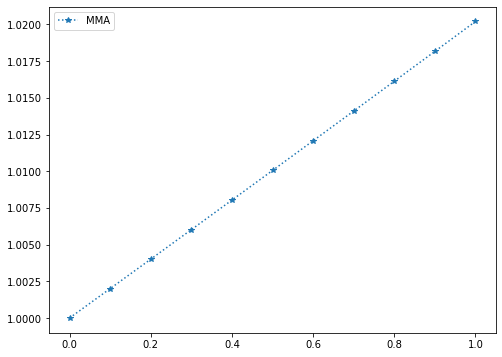

In [1]:
#그래프를 그리려면
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,6)
#import numpy as np
#------------------------------------------------------
times = np.linspace(0,1,11) #start, end, num of nodes
rate = 0.02
m0 = 1
MMA = [m0*np.exp(rate*t) for t in times] #this is python pure list
#------------------------------------------------------

MMA = np.array(MMA) #convert to numpy array why? more easy to handle

plt.plot(times, MMA, '*:', label='MMA')
plt.legend(loc='upper left')


### 정규분포 난수-- 정규분포가지고 놀아보기 워밍업
- np.random.normal  ; 정규분포의 난수  


In [6]:
import numpy as np
Z = np.random.normal(size=1000000)
print(np.mean(Z), np.std(Z))

-0.0005811087126090669 0.9999487636649517


-0.0014506483586618122 1.0013806786833133


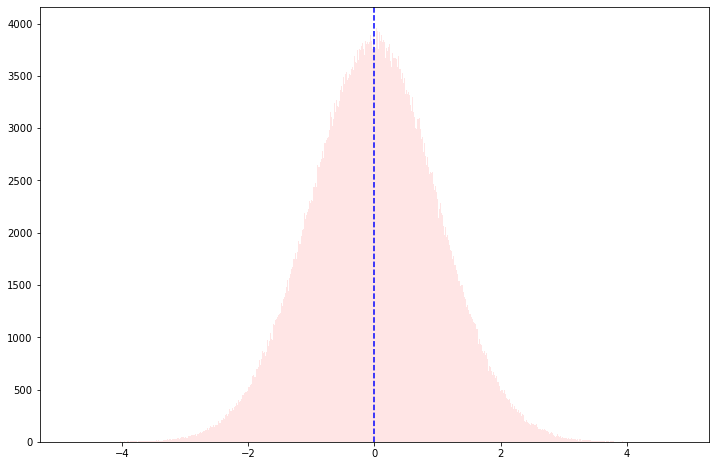

In [7]:
import numpy as np
Z = np.random.normal(size=1000000)
print(np.mean(Z), np.std(Z))
np.mean(Z**2)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,8)

plt.hist(Z, bins=1000, color='r', alpha=0.1)

ax = plt.gca()
ax.axvline(x=0,color='b',linestyle='--')

#### seed : 난수 생성 초기값 부여
- np.random.seed

In [11]:
#seed : 난수 생성 초기값 부여
np.random.seed(seed=13)
r1 = np.random.normal(size=5000000)
print('r1.shape= ', r1.shape)
np.random.seed(seed=1111)
r2 = np.random.normal(size=5000000)
print('r2.shape= ', r2.shape)

print(r1[:5])
print(r2[:5])
print(np.mean(r1), np.std(r1))
print(np.mean(r2), np.std(r2))

r1.shape=  (5000000,)
r2.shape=  (5000000,)
[-0.71239066  0.75376638 -0.04450308  0.45181234  1.34510171]
[-1.30001032 -1.07298904  0.79019919 -0.8782655   1.50182182]
-0.00013159502738671283 0.9998651676455419
-0.0004824474366181903 1.0003845698344713


In [15]:
#68.3% rule check
#numpy는 배열[] 안에 조건을 써서 원하는 부분을 가져올 수 있다.
a = r1[np.abs(r1)<=1]
#비율확인
print(len(a)/len(r1)*100, '%')

#### 68.3-95.4-99.7 rule
#https://ko.wikipedia.org/wiki/68-95-99.7_%EA%B7%9C%EC%B9%99

68.2612 %


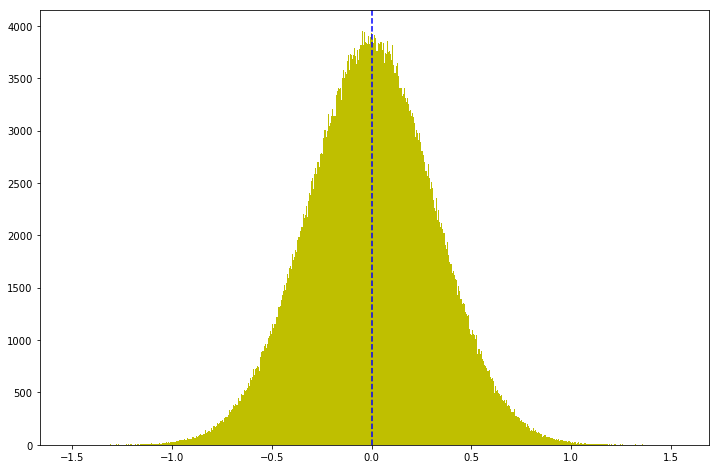

In [7]:
#playing 1mil-Z
T = 0.1
W = Z*np.sqrt(T)
plt.rcParams["figure.figsize"] = (12,8)
plt.hist(W,bins=1000, color='y')
ax = plt.gca()
ax.axvline(x=0,color='b',linestyle='--')


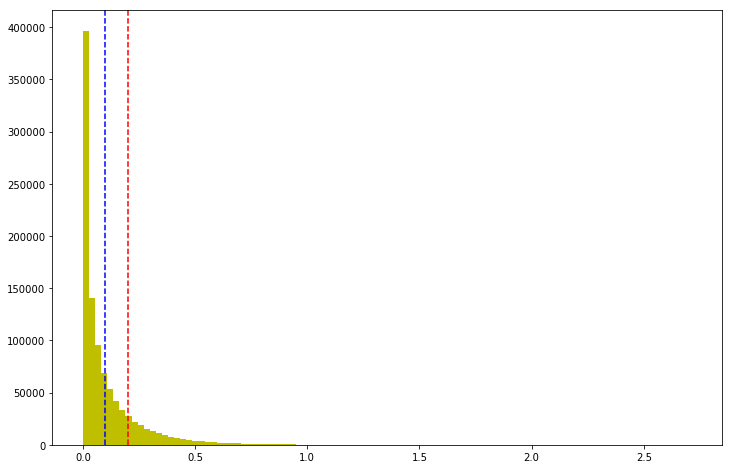

In [14]:
plt.hist(W**2,bins=100, color='y')
ax = plt.gca()
ax.axvline(x=1*T,color='b',linestyle='--')
ax.axvline(x=2*T,color='r',linestyle='--')


#### 표준정규분포의 난수 z을 path로 만들어 보자. 

In [17]:
n = 20
#seed = 11
#np.random.seed(seed)

times = np.linspace(0,1,n+1)
dt = np.diff(times)
print(times)
print('---------------------------------')
print(dt)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
---------------------------------
[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]


### 주가 하나 만들기
- 시간구간 이산화: times = np.linspace(0,1,n+1)  
- 위너프로세스 : $W(t) \sim N \left( 0, \sqrt{t} \right) $
- path 연결: : $W(t+ \Delta t) = W(t) + W(\Delta t)$
$$W[i+1] = W[i] + \sqrt{\Delta t} \epsilon, \, \epsilon \sim N(0,1)$$


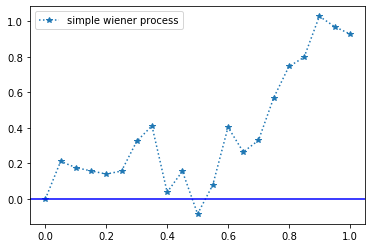

In [40]:
n = 20
#seed = 11
#np.random.seed(seed)

times = np.linspace(0,1,n+1)
dt = np.diff(times)

Z = np.random.normal(size=n)
W = np.zeros(n+1)
W[0] = 0
#start y is 0
for i,z in enumerate(Z):
    w = z*np.sqrt(dt[i])
    W[i+1] = W[i] + w
    #print(i,z,W[i])

plt.plot(times,W,'*:',label='simple wiener process')
plt.legend(loc='upper left')
#plt.xlim(0,1)
ax = plt.gca()
ax.axhline(y=0,color='b')

### 주가 path하나 만들기 (Euler method)
- $dS = \mu S dt + \sigma S dW$  
- $S[i+1] = S[i] + \mu S[i] dt + \sigma S[i] \sqrt{dt} \epsilon$  

### 주가 path하나 만들기 (Log method)
- $X = \ln S$  
- $dX = (\mu - 1/2 \sigma^2) dt + \sigma dW$  
- $X[i+1] = X[i] + (\mu - 1/2 \sigma^2) dt + \sigma \sqrt{dt} \epsilon$  


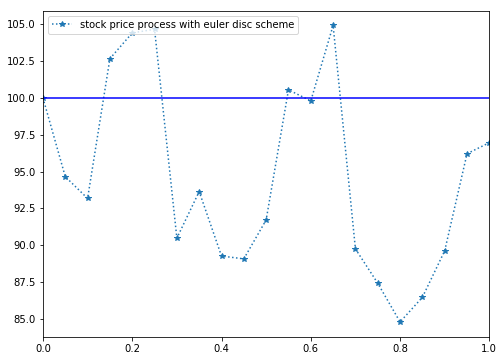

In [47]:
#seed = 11;np.random.seed(seed)
n = 20
times = np.linspace(0,1,n+1)
dt = np.diff(times)
Z = np.random.normal(size=n)
S = np.zeros(n+1)
S[0] = 100
mu = 0.03
sigma = 0.3
for i,z in enumerate(Z):
    dw = z*np.sqrt(dt[i])
    S[i+1] = S[i] + mu*S[i]*dt[i] + sigma*S[i]*dw
    #print(i,z,W[i])

plt.plot(times,S,'*:',label='stock price process with euler disc scheme')
plt.legend(loc='upper left')
plt.xlim(0,1)
ax = plt.gca()
ax.axhline(y=100,color='b')

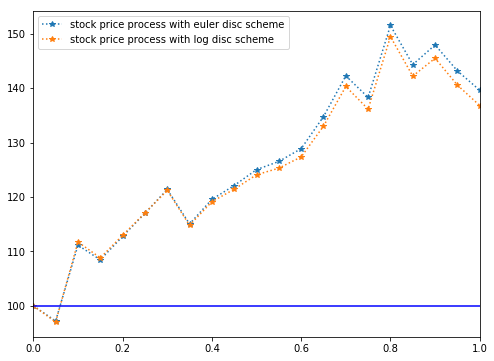

In [74]:
#seed = 11;np.random.seed(seed)
n = 20
times = np.linspace(0,1,n+1)
dt = np.diff(times)
Z = np.random.normal(size=n)

X = np.zeros(n+1)
X[0] = np.log(100)

S = np.zeros(n+1)
S[0] = 100

mu = 0.03
sigma = 0.3
for i,z in enumerate(Z):
    dw = z*np.sqrt(dt[i])
    X[i+1] = X[i] + (mu-0.5*sigma**2)*dt[i] + sigma*dw
    S[i+1] = S[i] + mu*S[i]*dt[i] + sigma*S[i]*dw
    #print(i,z,W[i])
S2 = np.exp(X)

plt.plot(times, S,'*:',label='stock price process with euler disc scheme')
plt.plot(times,S2,'*:',label='stock price process with log disc scheme')
plt.legend(loc='upper left'); plt.xlim(0,1); ax = plt.gca()
ax.axhline(y=100,color='b')

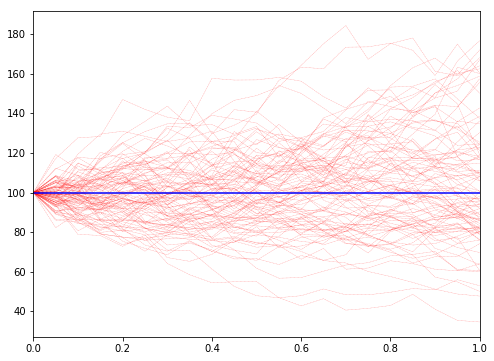

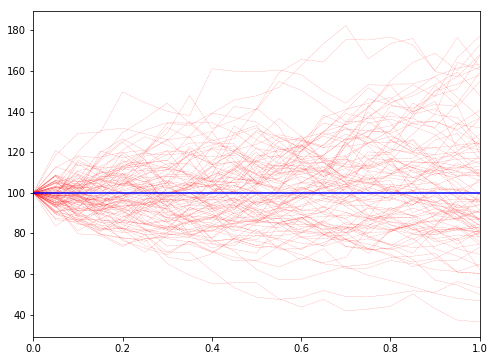

In [81]:
#seed = 11;np.random.seed(seed)
n = 20
times = np.linspace(0,1,n+1)
dt = np.diff(times)

mu = 0.03
sigma = 0.3
mcnum = 10000

X = np.zeros((mcnum,n+1))
X[:,0] = np.log(100)

S = np.zeros((mcnum,n+1))
S[:,0] = 100

for i,h in enumerate(dt):
    z = np.random.normal(size=mcnum)
    dw = z*np.sqrt(h)
    X[:,i+1] = X[:,i] + (mu-0.5*sigma**2)*h + sigma*dw
    S[:,i+1] = S[:,i] + mu*S[:,i]*h + sigma*S[:,i]*dw
    #print(i,z,W[i])
S2 = np.exp(X)

plt.figure(0)
for i in range(100):
    plt.plot(times, S [i,:],':',lw=0.3, c='r')
   
#plt.plot(times,S2,'*:',label='stock price process with log disc scheme')
plt.legend(loc='upper left'); plt.xlim(0,1); ax = plt.gca()
ax.axhline(y=100,color='b')

plt.figure(1)
for i in range(100):
    plt.plot(times, S2[i,:],':',lw=0.3, c='r')
   
#plt.plot(times,S2,'*:',label='stock price process with log disc scheme')
plt.legend(loc='upper left'); plt.xlim(0,1); ax = plt.gca()
ax.axhline(y=100,color='b')

### 행사가 120인 1년 만기 콜옵션의 가치평가
- 현재주가 100  
- 변동성 30%  
- 1년 제로금리 3%  
- 배당율 1%

### 콜옵션 가격의 평가(몬테카를로) 이지
- 만기 페이오프 만들기 : Payoff[i] = max(S[i,-1]- K, 0)   
- Payoff[i]를 모두 합하여 평균한 다음 현재가로 무위험 할인율 적용
- 로그주가의 미분방정식:
$$ d \ln S = (r-q- \frac{1}{2} \sigma^2) dt + \sigma dW $$


current value=  5.93041276080034


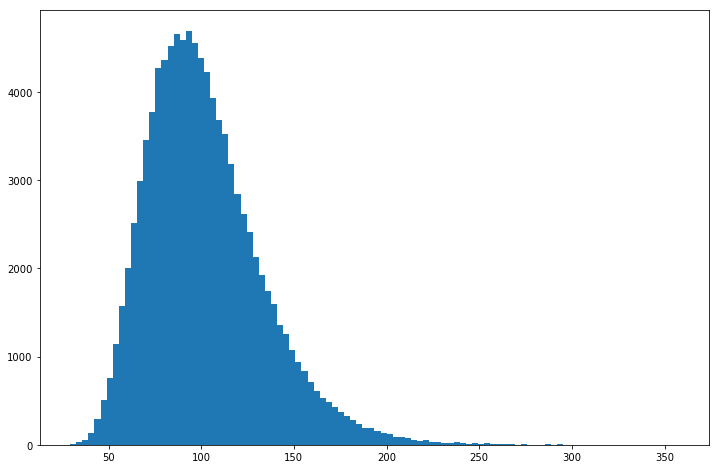

In [5]:
#seed = 11;np.random.seed(seed)
n = 1
times = np.linspace(0,1,n+1)
dt = np.diff(times)
mu = 0.02
qrate = 0.01
zrate = 0.03
sigma = 0.3
mcnum = 100000
S0 = 100
T = 1
K = 120
X = np.zeros((mcnum,n+1))
X[:,0] = np.log(S0)
P = np.zeros(mcnum) #<--Payoff

for i,h in enumerate(dt):
    z = np.random.normal(size=mcnum)
    dw = z*np.sqrt(h)
    X[:,i+1] = X[:,i] + (mu-0.5*sigma**2)*h + sigma*dw
    #print(i,z,W[i])
    
S = np.exp(X)
P = np.maximum(S[:,-1]-K,0)
df = np.exp(-zrate*T)
V = df*np.mean(P)

print('current value= ', V)
plt.figure(0)

plt.hist(S[:,-1],100)
plt.show()
#for i in range(100):
#    plt.plot(times, S [i,:],':',lw=0.3, c='r')
   
#plt.plot(times,S2,'*:',label='stock price process with log disc scheme')
#plt.legend(loc='upper left'); plt.xlim(0,1); ax = plt.gca()
#ax.axhline(y=100,color='b')

### 행사가 110, KO Barrier 120인 Barrier Call Option의 가치평가
- 현재주가 100  
- 변동성 30%  
- 1년 제로금리 3%  
- 배당율 1%
- Rebate 1, Pays At Maturity

### 가격의 평가(몬테카를로)
- Barrier 검출을 위한 시간구간을 생성  
- 생성된 각 주가가 중간에 Barrier를 히트하였는지 검출
- 만기 페이오프 만들기 : 
Payoff[i] = max(S[i,-1]- K, 0) if no hit  
Payoff[i] = Rebate if hit  

- Payoff[i]를 모두 합하여 평균한 다음 현재가로 무위험 할인율 적용
- 로그주가의 미분방정식:
$$ d \ln S = (r-q) dt + \sigma dW $$


In [26]:
#seed = 11;np.random.seed(seed)
import time

n = 365
times = np.linspace(0,1,n+1)
dt = np.diff(times)

mu = 0.02
qrate = 0.01
zrate = 0.03
sigma = 0.3
S0 = 100
Barrier = 120
Strike = 110
Rebate = 1
T = 1
df = np.exp(-zrate*T)
mcnum = 100000

X = np.zeros((mcnum,n+1))
X[:,0] = np.log(S0)
Payoff = np.zeros(mcnum)

start = time.time()
for i,h in enumerate(dt):
    z = np.random.normal(size=mcnum)
    dw = z*np.sqrt(h)
    X[:,i+1] = X[:,i] + (mu-0.5*sigma**2)*h + sigma*dw  
S = np.exp(X)

n1,n2,n3=0,0,0
for i,s in enumerate(S):
    if len(s[s>Barrier])>0:
        Payoff[i] = Rebate
        n1+=1
    elif s[-1]>Strike:
        Payoff[i] = s[-1]-Strike
        n2+=1
    else:
        Payoff[i] = 0
        n3+=1
        
end = time.time()

V = df*np.mean(Payoff)
print('Option Value= %f, ptime = %f'%(V, end-start))
print(n1,n2,n3)

Option Value= 0.551260, ptime = 2.859349
49556 2041 48403


In [25]:
len(Payoff)

100000

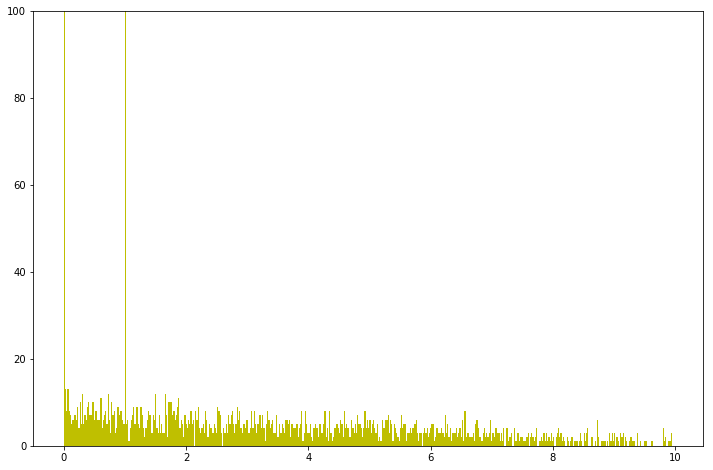

In [22]:
plt.hist(Payoff,bins=500,color='y')
plt.ylim(0,100)
plt.show()

In [27]:
import scipy.stats
scipy.stats.describe(Payoff)

DescribeResult(nobs=100000, minmax=(0.0, 39.980633320190464), mean=2.835801217505378, variance=46.13191471840987, skewness=2.8758751966862786, kurtosis=7.956303086933104)

### 행사가 120, Knock Out 130인 Rebate 1, 만기 1년 Call Option의 가치평가
- 현재주가 100  
- 변동성 30%  
- 1년 제로금리 3%  
- 배당율 1%
- Rebate 1

투자원금이 내재된 경우는 어떻게?  
1억원 납입, 참여율 participation rate: pr

if S(T)/S(0) >Strike and S(T)/S(0)<KOBarrier then  
Payoff= 1+rebate+max(S(T)/S(0)-Strike/S(0),0)
else  
Payoff= 1+rebate  
  
Payoff = Payoff*Notional  


In [7]:
n = 1
times = np.linspace(0,1,n+1)
dt = np.diff(times)
print('times= ',times)
print('dt= ',dt)


times=  [0. 1.]
dt=  [1.]


In [10]:
#옵션이 내재된 Linked Note
#100만원 납입 
import time

n = 1
times = np.linspace(0,1,n+1)
dt = np.diff(times)

mu = 0.02
qrate = 0.01
zrate = 0.03
sigma = 0.3
S0 = 100
Barrier = 130
Strike = 120
PartRate = 0.2
Rebate = 0.01
T = 1
df = np.exp(-zrate*T)
mcnum = 1000000
nominal = 100000000

X = np.zeros((mcnum,n+1))
X[:,0] = np.log(S0)

#S = np.zeros((mcnum,n+1))
#S[:,0] = S0

start = time.time()
for i,h in enumerate(dt):
    z = np.random.normal(size=mcnum)
    dw = z*np.sqrt(h)
    X[:,i+1] = X[:,i] + (mu-0.5*sigma**2)*h + sigma*dw  
    #S[:,i+1] = S[:,i] + mu*S[:,i]*h + sigma*S[:,i]*dw
S = np.exp(X)

S1 = S[:,-1]
P = np.zeros_like(S1) #np.zeros(mcnum)

for i,s in enumerate(S1):
    R = s/S0-1
    if R>=Strike/S0-1 and R<=Barrier/S0-1:
        P[i] = 1+Rebate+np.maximum(R*PartRate,0)
    else:
        P[i] = 1+Rebate

P = P*nominal
V = df*np.mean(P)
endt = time.time()
print('V, ptime= ', V, endt-start)



V, ptime=  98378484.74627237 1.2166802883148193


## FX Barrier Option

In [14]:
maturity = 1
barrierstarttime = 11/12
barrtimes = np.linspace(barrierstarttime, maturity, 21)
times = np.append(0,barrtimes)
times

array([0.        , 0.91666667, 0.92083333, 0.925     , 0.92916667,
       0.93333333, 0.9375    , 0.94166667, 0.94583333, 0.95      ,
       0.95416667, 0.95833333, 0.9625    , 0.96666667, 0.97083333,
       0.975     , 0.97916667, 0.98333333, 0.9875    , 0.99166667,
       0.99583333, 1.        ])

In [19]:

len(f[f>=upbarrier])

20

In [24]:
#FX BArrier, Partial time barrier
import time

dnbarrier = 880
upbarrier = 935
strike = 912
spot = 904
forward = 911
mu = np.log(forward/spot)/maturity
qrate = 0.01 #<--dollar zero rate at maturity
zrate = mu - qrate #<--implied domestic crosscurrency zero rate

cptype = 'c'
maturity = 1
barrierstarttime = 11/12
barrtimes = np.linspace(barrierstarttime, maturity, 21)
times = np.append([0],barrtimes)
dt = np.diff(times)

sigma = 0.1
df = np.exp(-zrate*maturity)
mcnum = 1000000
nominal = 10000

X = np.zeros((mcnum,len(times)))
X[:,0] = np.log(spot)

#S = np.zeros((mcnum,n+1))
#S[:,0] = S0
np.random.seed(1234)

start = time.time()
for i,h in enumerate(dt):
    z = np.random.normal(size=mcnum)
    dw = z*np.sqrt(h)
    X[:,i+1] = X[:,i] + (mu-0.5*sigma**2)*h + sigma*dw  

F = np.exp(X)
P = np.zeros(mcnum)
print(F.shape)

for i,f in enumerate(F):
    #print(i,f)
    f = f[1:]
    n1 = len(f[f>=upbarrier])
    n2 = len(f[f<=dnbarrier])
    #print(i, n1)
    #print(i, n2)
    if n1>0 or n2>0:
        P[i] = 0
    elif cptype=='c':
        P[i] = max(f[-1]-strike,0)
    elif cptype=='p':
        P[i] = max(strike-f[-1],0)        

P = P*nominal
V = df*np.mean(P)
endt = time.time()
print('V, V1= ',V, V/nominal)
#, endt-start


(1000000, 22)
V, V1=  3134.521044079691 0.3134521044079691


In [21]:
fwd = S0*np.exp((zrate-qrate)*T)
xx = [0,111, 120, 120, np.nan]
yy = [1,1,10,1,1]
sd = sigma*np.sqrt(T)
v0 = GeneralBlackFormula(xx,yy,fwd,sd,df)
print('analytic= %f, mc= %f, ptime = %f'%(v0, V, end-start))



def OptionPayoff(ss):
    payoff = np.zeros(len(ss))
    for i,s in enumerate(ss):
        if s>Barrier:
            payoff[i] = Rebate
        else:
            payoff[i] = np.maximum(np.maximum(s-Strike,0),Rebate)
    return payoff

ss = np.linspace(S0*3/4,S0*5/4,101)
pp = OptionPayoff(ss)
plt.plot(ss,pp)


<function numpy.amax(a, axis=None, out=None, keepdims=<no value>, initial=<no value>)>

### GeneralBlackFormula

$$
\mathrm{E}[\alpha F + \beta] = \alpha F_0 \left(N(d_1^a)-N(d_1^b) \right) 
+ \beta \left(N(d_2^a)-N(d_2^b) \right)
$$

where $d_1^K = \frac{\ln F_0/K}{\sigma\sqrt{T}} + \frac{1}{2}\sigma\sqrt{T}, \, 
d_2^K = d_1^K - \frac{1}{2}\sigma\sqrt{T}$

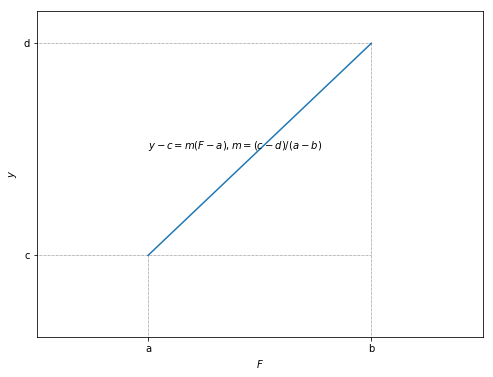

In [62]:
a,b,fa,fb=100,110,5,18
x0,x1,y0,y1=95,115,0,20
plt.plot([a,b],[fa,fb])
plt.plot([x0,b],[fa,fa], ':', c='k', lw=0.5)
plt.plot([x0,b],[fb,fb], ':', c='k', lw=0.5)
plt.plot([b,b],[y0,fb], ':', c='k', lw=0.5)
plt.plot([a,a],[y0,fa], ':', c='k', lw=0.5)
plt.text(a,0.5*(fa+fb),'$y-c=m(F-a), m=(c-d)/(a-b)$')
plt.xlim(x0, x1)
plt.ylim(y0, y1)
plt.xticks([a,b],['a', 'b'])
plt.yticks([fa,fb],['c', 'd'])
plt.xlabel('$F$')
plt.ylabel('$y$')

In [28]:
import numpy as np
from scipy.stats import norm

def GeneralBlackFormula(xx, yy, fwd, sd, df=1):
    p = 0.0
    if hasattr(xx, '__iter__'):
        x = np.array(xx).copy()
        y = np.array(yy).copy()
    else:
        x = [0,xx]
        y = [yy,yy]
        
    n = len(x)
    epi = 1e-8
    mpi = 1e8
    for i in range(n-1):
        if x[i]<epi:
            x[i] = epi
        elif np.isnan(x[i+1]) or x[i+1]<epi: #right x=0,nan means infty
            x[i+1] = mpi
        
        d11 = np.log(fwd/x[i])/sd+0.5*sd;
        d12 = d11-sd;
        d21 = np.log(fwd/x[i+1])/sd+0.5*sd;
        d22 = d21-sd;
        if x[i+1]>x[i]+epi:
            tangent = (y[i+1]-y[i])/(x[i+1]-x[i]);
        else:
            continue
        intercept = y[i]-tangent*x[i];
        try:
            p = p + tangent*fwd*(norm.cdf(d11,0,1)-norm.cdf(d21,0,1)) + \
                intercept*(norm.cdf(d12,0,1)-norm.cdf(d22,0,1));
        except:
            raise('error from GBF')
    return p*df

xx = [0,111, 120, 120, np.nan]
yy = [1,1,10,1,1]
fwd=100
sd=0.3
v1 = GeneralBlackFormula(xx,yy,fwd,sd)
v2 = GeneralBlackFormula([111,120],[0,9],fwd,sd)
v3 = GeneralBlackFormula(111,1,fwd,sd)
print(v1,v2+1,v3)

1.3670915858195614 1.3670915858195603 0.6907110064354388


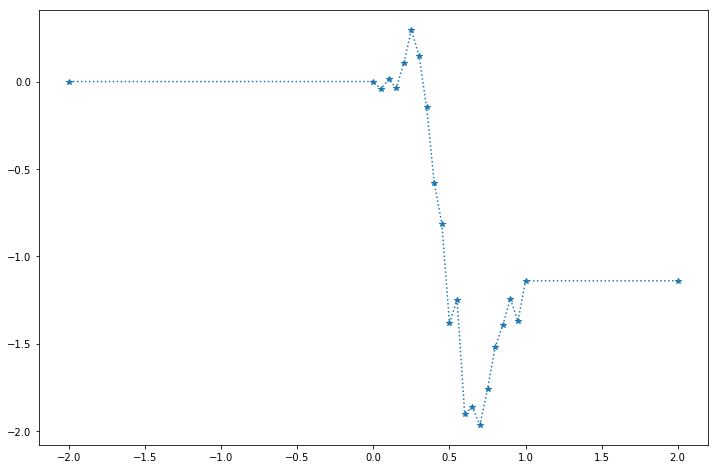

In [30]:
import copy

times2 = times.copy()

#times2 = copy.copy(times)
W2 = W.copy()
times2 = np.insert(times2,0,-2)
times2 = np.append(times2,+2)

W2 = np.insert(W2,0,0)
W2 = np.append(W2,W2[-1])

plt.plot(times2, W2,'*:')




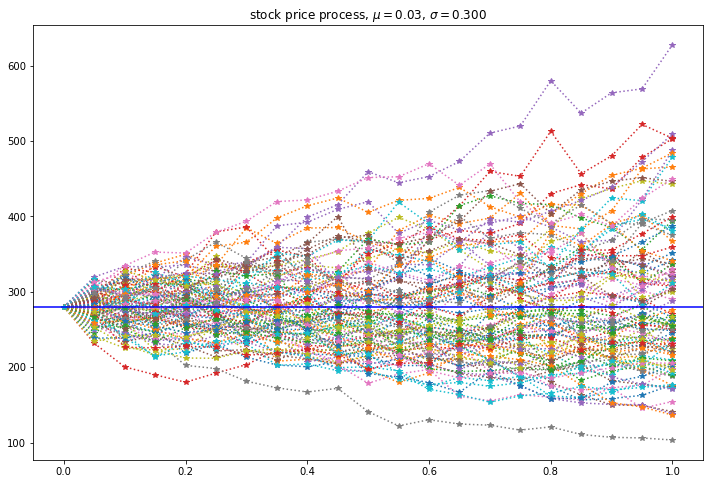

In [43]:
n = 20
times = np.linspace(0,1,n+1)
dt = np.diff(times)

#Z = np.random.normal(size=n)

mu = 0.03
sigma = 0.3
mcnum = 100
S = np.zeros((mcnum,n+1))
s0 = 280
S[:,0] = s0

#start y is 0
for i in range(0,n):
    h = dt[i]
    z = np.random.normal(size=mcnum)
    dw = z*np.sqrt(dt[i])
    S[:,i+1] = S[:,i] + mu*S[:,i]*h + sigma*S[:,i]*dw

for i in range(mcnum):
    plt.plot(times,S[i,:],'*:')

#plt.legend(loc='upper left')
#plt.xlim(0,1)
plt.title('stock price process, $\mu=$%.2f, $\sigma=$%.3f'%(mu,sigma))
ax = plt.gca()
ax.axhline(y=s0,color='b')


#### 표준정규분포의 난수 array- R을 위너프로세스의 path로 만들어 보자. 
- (1) 시간구간 $[0,T]$를 $N$개의 소구간으로 divide:   
- (2) 각 구간의 길이 구하기: np.diff()  
- (3) $N$개의 서로 독립적인 표준정규분포의 난수 생성: np.random.normal(size=N)   
- (4) $N$개의 난수에 구간길이 $\sqrt{\Delta t_i} \, i=1,2,\cdots,N$를 곱하면 표준편차가 구간길이가 되는 난수로 변환  
- (5) 실현된 값들 누적합 배열로 바꾼 후 연결($x$축은 $t$ $y$축은 변환된 난수값들)  


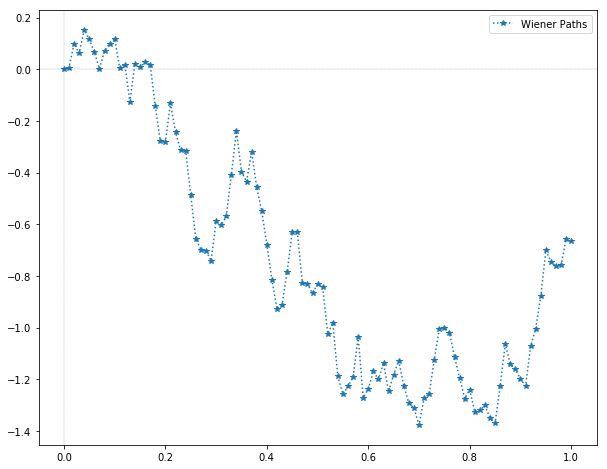

In [59]:
T = 1; N=100
R = np.random.normal(size=N)
times = np.linspace(0,T,N+1)
dtimes = np.diff(times)
wpaths = [0]

for i,dt in enumerate(dtimes):
    w = R[i]*np.sqrt(dt)
    wpaths.append(wpaths[-1]+w)

#-------------------------------
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(times, wpaths, '*:',label='Wiener Paths')
plt.legend(loc='upper right')
ax = plt.gca()
ax.axvline(x=0,color='k',linestyle=':',lw=0.3)
ax.axhline(y=0,color='k',linestyle=':',lw=0.3)



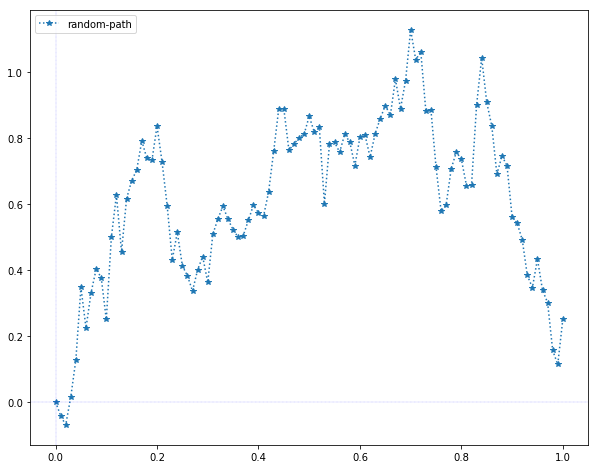

In [80]:
#-------------------------------
T = 1; N=100
Z = np.random.normal(size=N)
times = np.linspace(0,T,N+1)
dtimes = np.diff(times)
wpaths = [0]

for i,dt in enumerate(dtimes):
    w = Z[i]*np.sqrt(dt)
    wpaths.append(wpaths[-1]+w)

#-------------------------------
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(times, wpaths, '*:', label='random-path')
plt.legend(loc='upper left')
ax = plt.gca()
ax.axvline(x=0,color='b',linestyle=':',lw=0.3)
ax.axhline(y=0,color='b',linestyle=':',lw=0.3)


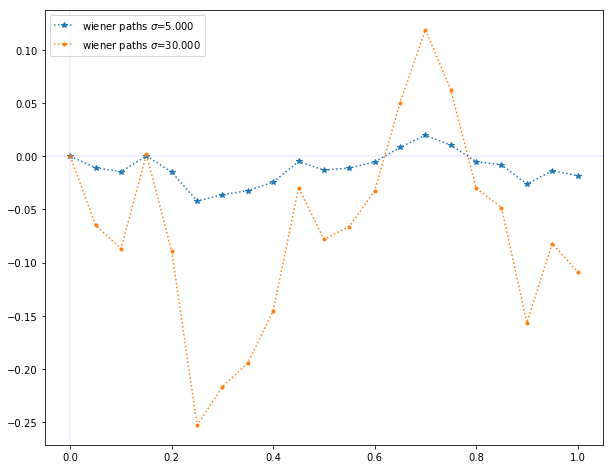

In [61]:
#변동성 sigma를 적용한 path와 비교
T = 1; N=20
Z = np.random.normal(size=N)
times = np.linspace(0,T,N+1)
dtimes = np.diff(times)
wpaths1 = [0]
wpaths2 = [0]
sigma1 = 0.05
sigma2 = 0.3

for i,dt in enumerate(dtimes):
    w = sigma1*np.sqrt(dt)*Z[i]
    wpaths1.append(wpaths1[-1]+w)

    w2 = sigma2*np.sqrt(dt)*Z[i]
    wpaths2.append(wpaths2[-1]+w2)

#-------------------------------
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(times, wpaths1,'*:',label='wiener paths $\sigma$=%.3f'%(100*sigma1))
plt.plot(times, wpaths2,'.:',label='wiener paths $\sigma$=%.3f'%(100*sigma2))
plt.legend(loc='upper left')
ax = plt.gca()
ax.axvline(x=0,color='b',linestyle=':',lw=0.3)
ax.axhline(y=0,color='b',linestyle=':',lw=0.3)


#### 주가 움직임의 모델 -- 수익율, 로그수익율, 가격간의 관계
- $X$를 (로그)수익율, 따르는 미분방정식이 $dX = m dt + \sigma dW$  
- 이산화: $ X_{n+1} = X_n + m \Delta t_n + \sigma \sqrt{\Delta t_n} \cdot \epsilon_n $  
- Take Exp $\rightarrow$ unitized stock price  
- Ito's Lemma: $\frac{dS}{S} = \mu dt + \sigma dW \rightarrow d\ln{S} = \left( \mu - \frac{1}{2} \sigma^2 \right) dt + \sigma dW $

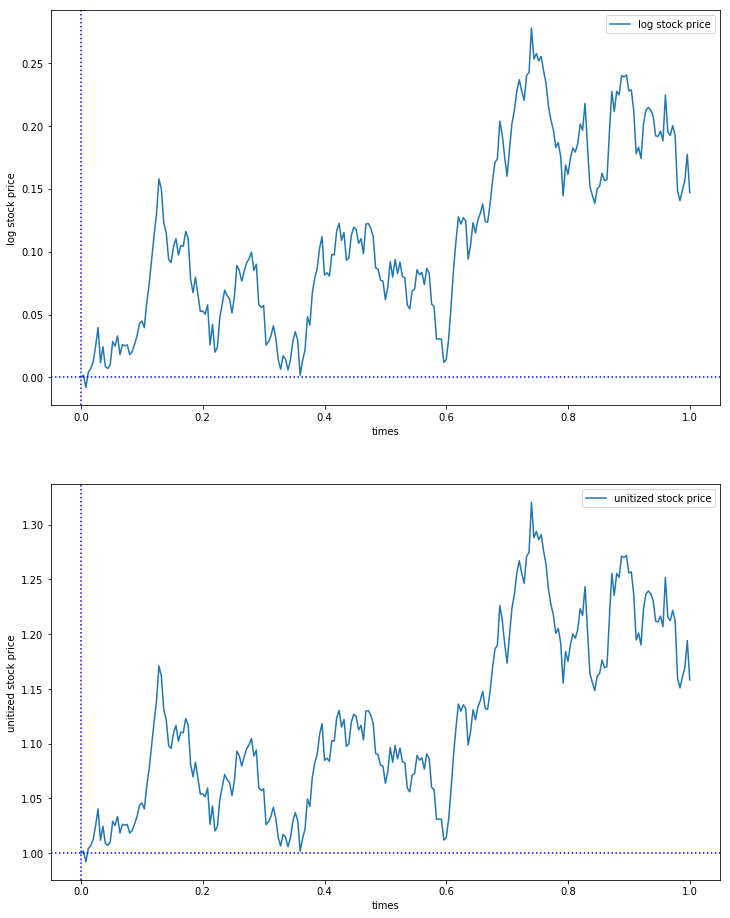

In [70]:
T = 1; N=250
R = np.random.normal(size=N)
times = np.linspace(0,T,N+1)
dtimes = np.diff(times)
wpaths = [0]
m = 0.02
sigma = 0.25
#-------------------------------
for i,dt in enumerate(dtimes):
    d = m*dt #drift-term
    w = sigma*R[i]*np.sqrt(dt) #random-term
    wpaths.append(wpaths[-1]+d+w)

#-------------------------------
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,16))
ax1,ax2 = ax.flatten()
#-------------------------------
ax1.plot(times, wpaths, label='log stock price')
ax1.axvline(x=0,color='b',linestyle=':')
ax1.axhline(y=0,color='b',linestyle=':')
ax1.set_xlabel('times')
ax1.set_ylabel('log stock price')
ax1.legend().set_visible(True)
#-------------------------------
ax2.plot(times, np.exp(wpaths), label='unitized stock price')
ax2.axvline(x=0,color='b',linestyle=':')
ax2.axhline(y=1,color='b',linestyle=':')
ax2.set_xlabel('times')
ax2.set_ylabel('unitized stock price')
ax2.legend().set_visible(True)



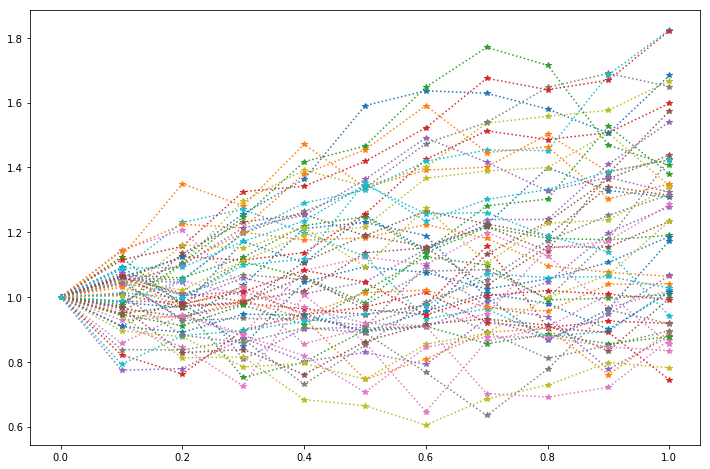

In [36]:
#X 의 확률 미분방정식이 dX=mdt+σdW
#X(0), m, σ and  times

n=10
times = np.linspace(0,1,n+1)
dtimes = np.diff(times)

mcnum = 50
x0 = 1
m = 0.2
v = 0.3
X = np.zeros((mcnum,n+1))
X[:,0] = x0

for i in range(1,n+1):
    R = np.random.normal(size=mcnum)
    h = dtimes[i-1]
    dx = m*h + v*np.sqrt(h)*R
    X[:,i] = X[:,i-1]+dx

for i in range(mcnum):
    plt.plot(times, X[i], '*:')







In [9]:
X

[1]

In [5]:
import pickle
ivdf = pickle.load(open('ivdf.pk','rb')) 
#ivdf
spot = ivdf.values[0,0]
times  = ivdf.values[0,1:]
zrates = ivdf.values[1,1:]
qrates = ivdf.values[2,1:]
strike = 12000
print('spot=%f, strike=%f'%(spot,strike))
for t,z,q in zip(times,zrates,qrates):
    print(t,z,q)

spot=11137.330000, strike=12000.000000
0.079452055 0.0038921 -0.001384323
0.167123288 0.0038921 0.00541273
0.419178082 0.004913204 -0.002715117
0.668493151 0.005603295 -0.001702512
0.917808219 0.005902806 0.02766697
1.419178082 0.007390039 0.017892731
2.416438356 0.010554678 0.022085708


In [14]:
#vanilla option pricing engine
import numpy as np
import pandas as pd
from scipy.stats import norm

def vanilla_black(spot, strike, maturity, sigma, r, q, cp=1):
    #cp=1 if cp==1 else cp=-1 #put
    df = np.exp(-r*maturity)
    dq = np.exp(-q*maturity)
    forward = spot*dq/df
    sd = sigma*np.sqrt(maturity)
    d1=np.log(forward/strike)/sd + sd/2
    d2=d1-sd
    black = df*(cp*forward*norm.cdf(cp*d1)-cp*strike*norm.cdf(cp*d2));
    return black

def vanilla_monte(spot, strike, maturity, sigma, 
                  times, zrates, qrates, cp=1, 
                  mcnum=None, mcseed=None):
    if mcnum is None:
        mcnum = 100000
    if mcseed is None:
        mcseed = 12345

    times2 = np.append(times[times<maturity],maturity)
    paths1 = np.ones(mcnum)
    generator = np.random.RandomState(mcseed)

    t1 = 0
    for j,t2 in enumerate(times2):
        dt = t2-t1
        r2 = interp1(t2,times,zrates)
        q2 = interp1(t2,times,qrates)
        r1 = interp1(t1,times,zrates)
        q1 = interp1(t1,times,qrates)
        r = (r2*t2-r1*t1)/dt
        q = (q2*t2-q1*t1)/dt
        
        paths2 = paths1*np.exp((r-q-0.5*sigma*sigma)*dt + \
                               sigma*np.sqrt(dt)*generator.randn(mcnum))
        t1 = t2
        if t2>=maturity:
            opvals = np.maximum(cp*spot*paths2-cp*strike,0)
        else:
            paths1 = paths2

    r = interp1(maturity,times,zrates)
    q = interp1(maturity,times,qrates)
    df = np.exp(-r*dt)
    mcval = df*np.mean(opvals)
    return mcval

#linear interpolation
def interp1(t, T, Z):
    n = len(T)
    if t <= T[0]:
        return Z[0]
    elif t >= T[n-1]:
        return Z[n-1]
    
    for i in range(n-1):
        if t >= T[i] and t < T[i+1]:
            m = (Z[i+1]-Z[i])/(T[i+1]-T[i])
            return Z[i]+m*(t-T[i])


if __name__ == "__main__":
    import pickle
    ivdf = pickle.load(open('ivdf.pk','rb')) 
    #ivdf
    spot = ivdf.values[0,0]
    times  = ivdf.values[0,1:]
    zrates = ivdf.values[1,1:]
    qrates = ivdf.values[2,1:]
    strike = 12000
    print('spot=%f, strike=%f'%(spot,strike))
    for t,z,q in zip(times,zrates,qrates):
        print(t,z,q)
    mcnum = 200000
    mcseed = 121
    maturity = 1.5
    sigma = 0.3
    
    r = interp1(maturity,times,zrates)
    q = interp1(maturity,times,qrates)
    
    blackp = vanilla_black(spot, strike, maturity, sigma, r, q, cp=1)
    montep = vanilla_monte(spot, strike, maturity, sigma,
                           times, zrates, qrates, cp=1, 
                           mcnum=mcnum, mcseed=mcseed)
    print('------------')
    print(blackp, montep)


spot=11137.330000, strike=12000.000000
0.079452055 0.0038921 -0.001384323
0.167123288 0.0038921 0.00541273
0.419178082 0.004913204 -0.002715117
0.668493151 0.005603295 -0.001702512
0.917808219 0.005902806 0.02766697
1.419178082 0.007390039 0.017892731
2.416438356 0.010554678 0.022085708
------------
1190.5519596266324 1203.1676231036158


#### 변동성 계산
- 저장된 자료를 부를 때는 dj30 = pickle.load(open('dj30df.pk','rb'))  


In [1]:
#저장된 자료를 부를 때는
import pickle
#pickle.dump(dj30df, open('dj30df.pk','wb'))
dj30 = pickle.load(open('dj30df.pk','rb'))
dj30

,^DJI,AXP,AAPL,BA,CAT,CSCO,CVX,DWDP,XOM,GS,...,PFE,PG,TRV,UNH,UTX,VZ,V,WBA,WMT,DIS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,24824.009766,97.872025,170.304230,292.470551,154.583557,37.968758,124.041260,70.727753,82.474052,253.217361,...,35.454571,88.337746,129.752609,218.914566,126.063583,51.670422,113.956306,73.589577,96.829727,110.908485
2018-01-03,24922.679688,98.475449,170.274567,293.416412,154.819824,38.271645,124.945450,71.858994,84.093849,250.860184,...,35.717266,88.230553,130.165543,221.210999,127.912811,50.608639,115.090790,74.139412,97.674377,111.384651
2018-01-04,25075.130859,100.113388,171.065506,292.303070,156.946030,38.379925,124.556557,73.236168,84.210243,254.366196,...,35.795109,88.854225,130.165543,222.171143,128.316116,50.772732,115.518715,70.300385,97.762772,111.335060
2018-01-05,25295.869141,100.341705,173.013123,304.293915,159.426620,38.911472,124.352379,74.190361,84.142349,253.068802,...,35.863213,88.912689,129.929596,226.407700,129.417801,50.656898,118.285271,71.596428,98.342232,110.729919
2018-01-08,25283.000000,99.418495,172.370514,305.584656,163.432938,39.315060,124.964897,73.934601,84.520630,249.394379,...,35.464302,89.380447,129.231567,222.477997,130.647369,50.570026,118.762939,72.509552,99.795815,109.142677
2018-01-09,25385.800781,99.785797,172.350739,313.742767,163.826675,39.068970,124.294037,74.111656,84.161743,251.503952,...,35.425381,88.727539,130.234360,223.586639,132.073639,50.384541,118.534065,72.087349,98.597603,109.063316
2018-01-10,25369.130859,100.480690,172.311188,315.545807,163.275452,39.285530,125.091301,72.990242,83.492493,251.890213,...,35.483761,88.162338,129.880432,221.923691,132.693314,50.462639,118.404694,72.735374,97.890442,108.597061
2018-01-11,25574.730469,99.994263,173.289948,323.290100,166.553375,39.472557,128.892838,73.993622,84.316940,252.682556,...,35.571327,87.850502,130.106552,223.101608,132.781860,50.872665,119.260529,74.011772,98.234200,110.104942
2018-01-12,25803.189453,100.232513,175.079391,331.261017,167.636139,40.230507,129.894287,74.180519,84.889206,254.564301,...,35.551868,87.324272,132.456207,226.318619,134.345840,50.628605,119.509315,74.689255,99.069023,111.573143


In [7]:
import numpy as np
P = dj30.iloc[:,0]
Y = [np.log(p2/p1) for p1, p2 in zip(P[:-2],P[1:-1])]
print('np.std= ', np.std(Y))


np.std=  0.00996817086597827


In [21]:
prices = dj30.values.T
price_ratios = [p[1:]/p[:-1] for p in prices]
#price_ratios = np.array(price_ratios)
log_yields = np.log(price_ratios)

m=0; sd=0; a = log_yields[0] #i-th 종목의 로그수익율
for y in a: 
    m += y 
m /= len(a)

for y in a: 
    sd += (y-m)**2
sd = np.sqrt(sd/(len(a)))
print(sd, np.std(a))

0.009939972695630076 0.009939972695630076


In [28]:
#평균,분산 계산
mu = 0
cnt = 0
for x in dj30['AAPL']:
    mu += x
    cnt += 1
    
mu = mu/cnt
mu

var = 0
for x in dj30['AAPL']:
    var += (x-mu)**2
var = var/cnt
print(mu, var)

184.58050005623463 311.5685473786663


#### 유럽형 옵션과 블랙숄즈 모델 
#####  주가의 로그정규분포
- $X$가 정규분포를 따름 $X \sim N(m, v) \Rightarrow \mathrm{pdf}(x) = \frac{1}{ v \sqrt{2\pi}} \exp \left( -\frac{(x-m)^2}{2 v^2} \right)$  
  
  
- 주가는 로그정규분포 즉 $\ln S(T) \sim \ln S(0) + N\left( (r-\frac{1}{2} \sigma^2)T , \sigma \sqrt{T} \right)$  
  
  
- $\Rightarrow X = \ln S(T), m= \ln S(0) + (r-\frac{1}{2} \sigma^2)T, v = \sigma \sqrt{T}$ 

#####  블랙숄즈 모델 
- 만기 $T$, 이자율 및 배당율 $r, q$, 변동성 $\sigma$인 콜옵션 가격  

$$C(T,r,\sigma) = \exp(-rT) \cdot \mathrm{E} [\max(S(T)-K,0)]$$  
  
  
- $\mathrm{E} [\max(S(T)-K,0)] = \mathrm{E} [\max(e^X-K,0)] = 
\int_{K}^{\infty} (e^x-K) \cdot \mathrm{pdf}(x) dx $  
  
  
- $\mathrm{E} [S(T)] = S(0)e^{(r-q)T} = F(T) $라 두자.  
  
  
- $표준정규분포로 치환: Z = \frac{\ln S(T)-m}{v}, \,
\mathrm{pdf}(z) = f(z) = \frac{1}{ \sqrt{2\pi}} \exp \left( -\frac{z^2}{2 } \right)$  


- $\int_{K}^{\infty} (e^x-K) \cdot \mathrm{pdf}(x) dx  = 
\int_{\frac{\ln K -m}{v}}^{\infty} e^{{zv}+m}f(z)dz -
K \int_{\frac{\ln K -m}{v}}^{\infty} f(z)dz $  


- $\mathrm{E} [\max(S(T)-K,0)] = e^{m+\frac{v^2}{2}} N(d_1) - K N(d_2) \cdots $ Black76 Formula    
여기서 $d_1 = \frac{\ln\frac{F(T)}{K}}{v} + \frac{v}{2}$, $d_2 = d_1 - v$, 
$e^{m+\frac{v^2}{2}} = F(T) = S(0)e^{(r-q)T}$




- 직접계산 easy : $ e^{zv+m}f(z) = e^{m+\frac{v^2}{2}} f(z-v) $, $\int_{a}^{\infty} f(z)dz = 1-N(a) = N(-a)$  


#### Black Scholes Call / Put Greeks
![](BlackGreeks.png?raw=true)

#### Black 76 and 73 Model Code

In [1]:
from scipy.stats import norm
import numpy as np

def Black76(F,T,K,df,sd,w=1):
    d1 = np.log(F/K)/sd+sd/2
    d2 = d1-sd
    return w*F*norm.cdf(w*d1)-w*K*norm.cdf(w*d2)

def Black73(S0,T,K,r,q,sigma,w=1):
    df = np.exp(-r*T)
    sd = sigma*np.sqrt(T)
    F = S0*np.exp((r-q)*T)
    return df*Black76(F,T,K,df,sd,w)

def BlackGreeks(S0,T,K,r,q,sigma,w=1):
    df = np.exp(-r*T)
    dq = np.exp(-q*T)
    sd = sigma*np.sqrt(T)
    F = S0*np.exp((r-q)*T)
    d1 = np.log(F/K)/sd+sd/2
    d2 = d1-sd
    delta = w*dq*norm.cdf(w*d1)
    vega = S0*dq*norm.pdf(d1)/np.sqrt(T)
    gamma = dq*norm.pdf(d1)/S0/sd
    rho = w*K*T*df*norm.cdf(w*d2)
    return delta,vega,gamma,rho

def CallPayoff(S, K):
    return np.maximum(S-K,0)

def PutPayoff(S, K):
    return np.maximum(K-S,0)

S0=100;
T=1
K=100
r=0.02
q=0
sigma=0.2
w=-1
Black73(S0,T,K,r,q,sigma,w)

6.935904609248079

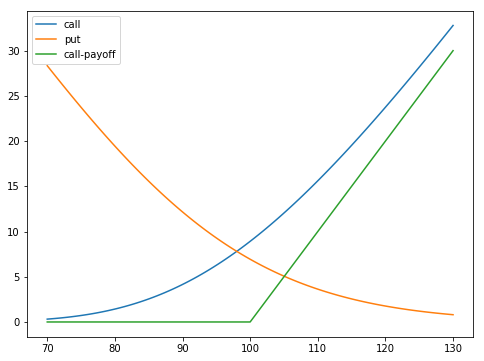

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,6)
import numpy as np

n=100
T= 1
sarr = np.linspace(70,130,n+1)
varr = np.linspace(0.1,0.5,n+1)
carr = Black73(sarr,T,K,r,q,sigma,1)
parr = Black73(sarr,T,K,r,q,sigma,-1)
callpf = CallPayoff(sarr,K)
putpf = PutPayoff(sarr,K)

plt.plot(sarr, carr, label='call')
plt.plot(sarr, parr, label='put')
plt.plot(sarr, callpf, label='call-payoff')

plt.legend()


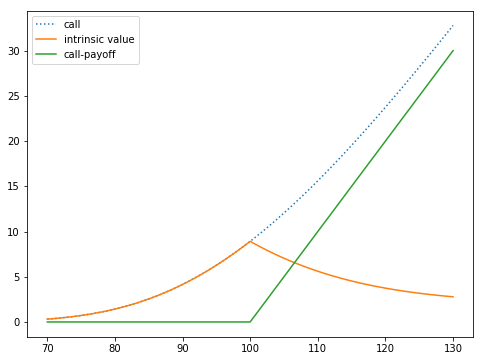

In [42]:
plt.plot(sarr, carr, linestyle=':',label='call')
plt.plot(sarr, carr-callpf, label='intrinsic value')
plt.plot(sarr, callpf, label='call-payoff')

plt.legend()

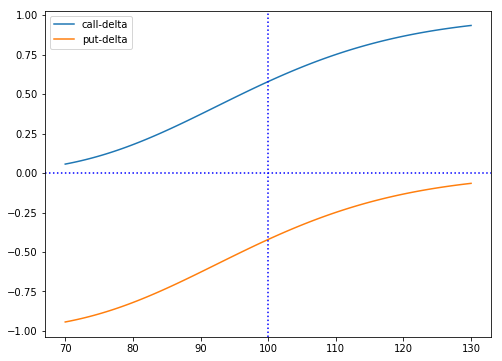

In [16]:
#Delta
cdelta,cvega,cgamma,crho=BlackGreeks(sarr,T,K,r,q,sigma,1)
pdelta,pvega,pgamma,prho=BlackGreeks(sarr,T,K,r,q,sigma,-1)

plt.plot(sarr, cdelta, linestyle='-',label='call-delta')
plt.plot(sarr, pdelta, linestyle='-',label='put-delta')

ax = plt.gca()
ax.axhline(y=0,color='b',linestyle=':')
ax.axvline(x=K,color='b',linestyle=':')
plt.legend()

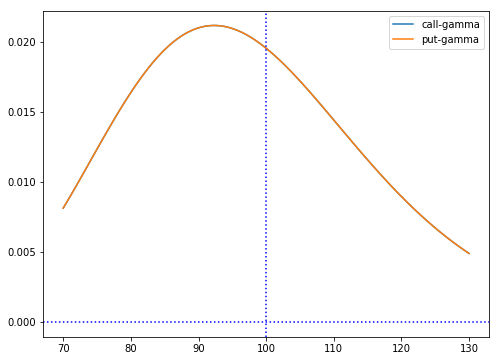

In [17]:
#Gamma
#cdelta,cvega,cgamma,crho=BlackGreeks(sarr,T,K,r,q,sigma,1)
#pdelta,pvega,pgamma,prho=BlackGreeks(sarr,T,K,r,q,sigma,-1)

plt.plot(sarr, cgamma, linestyle='-',label='call-gamma')
plt.plot(sarr, pgamma, linestyle='-',label='put-gamma')

ax = plt.gca()
ax.axhline(y=0,color='b',linestyle=':')
ax.axvline(x=K,color='b',linestyle=':')
plt.legend()

\documentclass{article}
\usepackage{tikz}
\usetikzlibrary{matrix}

\begin{document}
  \begin{tikzpicture}[>=stealth,sloped]
    \matrix (tree) [%
      matrix of nodes,
      minimum size=1cm,
      column sep=3.5cm,
      row sep=1cm,
    ]
    {
          &   & F \\
          & C &   \\
      \$A &   & E \\
          & B &   \\
          &   & D \\
    };
    \draw[->] (tree-3-1) -- (tree-2-2) node [midway,above] {$P$};
    \draw[->] (tree-3-1) -- (tree-4-2) node [midway,below] {$(1-p)$};
    \draw[->] (tree-2-2) -- (tree-1-3) node [midway,above] {$P^2$};
    \draw[->] (tree-2-2) -- (tree-3-3) node [midway,below] {$(1-p)p$};
    \draw[->] (tree-4-2) -- (tree-3-3) node [midway,above] {$(1-p)p$};
    \draw[->] (tree-4-2) -- (tree-5-3) node [midway,below] {$(1-p)^2$};
  \end{tikzpicture}
\end{document}

Cholesky factorization (by Andre-Louis Cholesky) of the correlation matrix $A$ to determine the lower triangular matrix $L$ so that $A = LL^T$. 
This factorization is possible on a symmetric positive-definite matrix
